<a href="https://www.kaggle.com/code/sonalanand/houses-in-london-eda-and-data-visualisation?scriptVersionId=216375630" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Exploratory Data Analysis and Data Visualizations**

## **Introduction**

This Jupyter notebook demonstrates **data manipulation** and **visualization techniques** using Python, with a focus on practical examples that are relevant for data analysis and interpretation. The key objectives of this notebook include:

1. **Data Manipulation:**
   - Practical implementation of `filter`, `map`, and `apply` for working with pandas DataFrames.
   - Techniques for extracting and transforming specific data points (e.g., extracting domain names from email addresses).

2. **Data Visualization:**
   - Creating and customizing visualizations using **Seaborn** and **Matplotlib** to explore and represent data insights effectively.
   - Plots covered:
     - Scatter plots
     - Histograms
     - Boxplots
     - Heatmaps
     - Pie charts

3. **Correlation Analysis:**
   - Computation and visualization of correlation matrices using heatmaps to analyze relationships between numerical variables.

## **Dataset Description**

The dataset used contains hypothetical or real-world properties, including features like:
- `Emails`: User emails (used for domain extraction examples).
- `Price (£)`: Property prices (used for correlation and visualization).
- `Building Age`: Age of the building in years.
- `Square Meters`: Property size in square meters.
- Other categorical and numerical features.

## **Purpose**

This notebook is designed for:
- Demonstrating **core Python programming concepts** for data analysis (e.g., regex, lambda functions).
- Building **professional-quality visualizations** for exploratory data analysis (EDA).
- Preparing for **data analyst interviews** by showcasing real-world coding examples.

---

## **Table of Contents**
1. [Data Manipulation with `filter`, `map`, and `apply`](#Data-Manipulation)
2. [Data Visualizations with Seaborn and Matplotlib](#Visualizations)
3. [Correlation Analysis and Heatmaps](#Correlation-Heatmaps)
4. [Conclusion and Key Insights](#Conclusion)


In [1]:
import os

# List all files and folders in /kaggle/input
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/houses-in-london/london_houses.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/houses-in-london/london_houses.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")


Dataset loaded successfully.
                Address  Neighborhood  Bedrooms  Bathrooms  Square Meters  \
0      78 Regent Street  Notting Hill         2          3            179   
1     198 Oxford Street   Westminster         2          1            123   
2      18 Regent Street          Soho         5          3            168   
3  39 Piccadilly Circus     Islington         5          1            237   
4      116 Fleet Street    Marylebone         4          1            127   

   Building Age Garden Garage  Floors  Property Type        Heating Type  \
0            72     No     No       3  Semi-Detached    Electric Heating   
1            34    Yes     No       1      Apartment     Central Heating   
2            38     No    Yes       3  Semi-Detached     Central Heating   
3            53    Yes    Yes       1      Apartment  Underfloor Heating   
4            23     No    Yes       2  Semi-Detached     Central Heating   

              Balcony Interior Style    View       

In [3]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


'''

Beginner Questions---

1.	Calculate Price per Square Meter Add a column price_per_sq_meter to calculate the price of the house per square meter.
Use the formula: Price per Square Meter=  Price / Square Meters.


2.	Flag Old and New Buildings Create a column building_age_category:
o	"New" if Building Age <= 10.
o	"Old" if Building Age > 10.


3.	Categorise by Garden Availability Add a column garden_flag:
o	True if Garden is "Yes".
o	False otherwise.


4.	Floor Count Category Create a column floor_category:
o	"Single Floor" if Floors = 1.
o	"Multi-Floor" if Floors > 1.





Intermediate Questions---

5.	Luxury vs Affordable Neighborhoods Create a column neighborhood_category:
o	"Luxury" if the average Price (£) in the Neighborhood is greater than 2,000,000.
o	"Affordable" otherwise.


6.	Calculate Balcony Accessibility Add a column balcony_accessibility_score:
o	Score = 10 for "High-level Balcony".
o	Score = 5 for "Low-level Balcony".
o	Score = 0 for "No Balcony".


7.	Material-Based Categorisation Create a column material_category:
o	"Premium" for houses built with Marble, Granite, or Wood.
o	"Standard" for other materials.


8.	Analyse Garage Ownership Add a column garage_flag:
o	True if Garage is "Yes".
o	False otherwise.





 
Advanced Questions---

9.	Neighbourhood Price Deviation Add a column price_deviation_from_neighborhood:
o	Subtract the average Price (£) in the Neighborhood from each house’s price.


10.	Detect High Floors in Apartments Add a column high_floor_apartment_flag:
o	True if Property Type is "Apartment" and Floors > 2.
o	Otherwise, False.


11.	Categorise Heating Efficiency Create a column heating_efficiency:
o	"High" if Heating Type is "Central Heating" or "Underfloor Heating".
o	"Low" otherwise.


12.	Flag High Square Meter Density Add a column high_density_flag:
o	True if Square Meters per Floors is less than 50.
o	Otherwise, False.





 
Complex Challenges----

13.	Identify Renovation Candidates Add a column needs_renovation:
o	True if Building Status is "Old" and Interior Style is not "Modern".
o	Otherwise, False.


14.	Neighbourhood-Wise Price Rank Create a column neighborhood_price_rank:
o	Rank the houses in each Neighborhood by Price (£) in descending order.


15.	Categorise View Quality Create a column view_quality:
o	"High Quality" if View is "Park" or "Garden".
o	"Low Quality" for other views.


16.	Calculate Property Investment Score Add a column investment_score:
o	Formula: Investment Score=Price (£)Building Age+1+Square Meters\text{Investment Score} = \frac{\text{Price (£)}}{\text{Building Age} + 1} + \text{Square Meters}Investment Score=Building Age+1Price (£)+Square Meters
 





Visualisation Questions------------

Scatter Plot
1.	Plot Price (£) vs Square Meters. Use Neighborhood as the hue.


Histogram
2.	Create a histogram of Building Age for properties with and without a Garage.


Boxplot
3.	Compare the distribution of Price (£) across different Property Type categories.


Violin Plot
4.	Create a violin plot showing Square Meters across properties with and without Garden.


Pair Plot
5.	Generate a pair plot for the columns Bedrooms, Bathrooms, Square Meters, and Price (£) with different colours for Heating Type.


Heatmap
6.	Create a heatmap for the correlation matrix of numerical columns.


FacetGrid
7.	Use FacetGrid to create a grid of histograms of Building Age, separated by Property Type.


Pie Chart
8.	Create a pie chart to show the proportion of properties by Interior Style.






Challenge Tasks----------

1.	Compare Neighbourhoods by Balcony Type
o	Create a bar plot showing the count of houses with each balcony type (High-level Balcony, Low-level Balcony, No Balcony) for each Neighborhood.

2.	Investment Opportunity Heatmap
o	Use a heatmap to show the average Price per Square Meter for each combination of Neighborhood and Property Type.

3.	Garage vs Price Analysis
o	Create a scatter plot of Price (£) vs Building Age, with different markers for houses with and without garages.

4.	Property Age Distribution
o	Plot the distribution of Building Age across different Neighborhoods using a violin or box plot.

5.	Price vs Interior Style
o	Plot a boxplot comparing the Price (£) for properties based on Interior Style.





'''

In [4]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


1.	Calculate Price per Square Meter
	Add a column price_per_sq_meter to calculate the price of the house per square meter.
   Use the formula: Price per Square Meter=  Price / Square Meters.

In [5]:
df['price_per_sq_meter (£)'] = df.apply(lambda x : x['Price (£)'] / x['Square Meters'], axis = 1)
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sq_meter (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.000000
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.000000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.000000
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.000000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,12000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400,14400.000000
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333,8666.661538
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399,10399.994764
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000,13000.000000


2.	Flag Old and New Buildings Create a column building_age_category:
o	"New" if Building Age <= 10.
o	"Old" if Building Age > 10.

In [6]:
df['building_age_category'] = df['Building Age'].apply(lambda x : 'New' if x <= 10 else 'Old')
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.000000,Old
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.000000,Old
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.000000,Old
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.000000,Old
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,12000.000000,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400,14400.000000,New
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333,8666.661538,Old
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399,10399.994764,Old
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000,13000.000000,New


3.	Categorise by Garden Availability Add a column garden_flag:
o	True if Garden is "Yes".
o	False otherwise.

In [7]:
df['garden_flag'] = df['Garden'].apply(lambda x : x == 'Yes')
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.000000,Old,False
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.000000,Old,True
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.000000,Old,False
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.000000,Old,True
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000,12000.000000,Old,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400,14400.000000,New,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333,8666.661538,Old,False
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399,10399.994764,Old,False
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000,13000.000000,New,True


4.	Floor Count Category Create a column floor_category:
o	"Single Floor" if Floors = 1.
o	"Multi-Floor" if Floors > 1.

In [8]:
df['floor_category'] = df['Floors'].apply(lambda x : 'Single Floor' if x == '1' else 'Multi - Floor' )
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Balcony,Interior Style,View,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200,12800.000000,Old,False,Multi - Floor
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000,12000.000000,Old,True,Multi - Floor
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,No Balcony,Industrial,Street,Wood,Renovated,1881600,11200.000000,Old,False,Multi - Floor
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,No Balcony,Classic,Park,Granite,Renovated,1896000,8000.000000,Old,True,Multi - Floor
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,No Balcony,Modern,Park,Wood,Old,1524000,12000.000000,Old,False,Multi - Floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400,14400.000000,New,True,Multi - Floor
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,No Balcony,Industrial,Garden,Wood,Old,563333,8666.661538,Old,False,Multi - Floor
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399,10399.994764,Old,False,Multi - Floor
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000,13000.000000,New,True,Multi - Floor


5.	Luxury vs Affordable Neighborhoods Create a column neighborhood_category:
o	"Luxury" if the average Price (£) in the Neighborhood is greater than 2,000,000.
o	"Affordable" otherwise.

In [9]:
df['Neighborhood'].value_counts()

Neighborhood
Kensington      114
Marylebone      113
Camden          106
Westminster      98
Islington        97
Greenwich        97
Notting Hill     96
Soho             96
Chelsea          94
Shoreditch       89
Name: count, dtype: int64

In [10]:
avg_price_per_neighborhood = df.groupby('Neighborhood')['Price (£)'].mean()
avg_price_per_neighborhood

Neighborhood
Camden          1.626332e+06
Chelsea         2.452894e+06
Greenwich       1.269409e+06
Islington       1.507373e+06
Kensington      2.282233e+06
Marylebone      1.824982e+06
Notting Hill    1.957589e+06
Shoreditch      1.332829e+06
Soho            1.781121e+06
Westminster     2.291437e+06
Name: Price (£), dtype: float64

In [11]:
df['average_price'] = df['Neighborhood'].map(avg_price_per_neighborhood)
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Interior Style,View,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Industrial,Garden,Marble,Renovated,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Industrial,City,Laminate Flooring,Old,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Industrial,Street,Wood,Renovated,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Classic,Park,Granite,Renovated,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Modern,Park,Wood,Old,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Modern,Street,Laminate Flooring,Renovated,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Industrial,Garden,Wood,Old,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Minimalist,Park,Laminate Flooring,Old,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Modern,Park,Laminate Flooring,Renovated,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06


In [12]:
df['neighborhood_category'] = df['average_price'].apply(lambda x: 'Luxury' if x > 2000000 else 'Affordable')
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,View,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Garden,Marble,Renovated,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,City,Laminate Flooring,Old,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Street,Wood,Renovated,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Park,Granite,Renovated,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Park,Wood,Old,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Street,Laminate Flooring,Renovated,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Garden,Wood,Old,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Park,Laminate Flooring,Old,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Park,Laminate Flooring,Renovated,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable


6.	Calculate Balcony Accessibility Add a column balcony_accessibility_score:

o	Score = 10 for "High-level Balcony".
o	Score = 5 for "Low-level Balcony".
o	Score = 0 for "No Balcony".

In [13]:
df['Balcony'].value_counts()

Balcony
No Balcony            340
High-level Balcony    331
Low-level Balcony     329
Name: count, dtype: int64

In [14]:
df['balcony_accessibility_score'] = df['Balcony'].apply(lambda x : 10 if x == 'High-level Balcony' else 5 if x == 'Low-level Balcony' else 0)
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Materials,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Marble,Renovated,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Laminate Flooring,Old,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Wood,Renovated,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable,0
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Granite,Renovated,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Wood,Old,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Laminate Flooring,Renovated,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Wood,Old,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Laminate Flooring,Old,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Laminate Flooring,Renovated,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10


7.	Material-Based Categorisation Create a column material_category:
o	"Premium" for houses built with Marble, Granite, or Wood.
o	"Standard" for other materials.

In [15]:
df['Materials'].value_counts()

Materials
Wood                 264
Laminate Flooring    258
Marble               243
Granite              235
Name: count, dtype: int64

In [16]:
df['material_category'] = df['Materials'].apply(lambda x : 'Premium' if x == 'Marble' or x == 'Granite' or x == 'Wood' else 'Standard')
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Building Status,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Renovated,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Old,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Renovated,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable,0,Premium
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Renovated,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Old,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Renovated,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Old,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Old,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Renovated,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard


8.	Analyse Garage Ownership Add a column garage_flag:
o	True if Garage is "Yes".
o	False otherwise.

In [17]:
df['garage_flag'] = df['Garage'].apply(lambda x : x == 'Yes')
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable,0,Premium,True
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False


'''

Filter Practice Questions------

1.	List all properties with more than 3 bedrooms and located in Camden.
2.	Filter out properties with "Old" building status and more than 50 years of age.
3.	Find properties that have a garden and a garage but are not semi-detached.
4.	Show properties where the price is above £2,000,000 and the view is "Park".
5.	List all apartments with electric heating and high-level balconies.
6.	Display properties in Westminster that are either "Renovated" or "Modern".
7.	Filter out properties with "Street" view and "Industrial" interior style.



Map Practice Questions------

1.	Create a new column that calculates the price per square meter for each property.

2.	Generate a list of messages like:
"Property at {Address} with {Bedrooms} bedrooms is priced at £{Price}".

3.	Map each property to a new category based on price:
o	"Luxury" for prices above £2,000,000
o	"Affordable" for prices between £1,000,000 and £2,000,000
o	"Budget" for prices below £1,000,000

4.	Calculate a new column "Value Index" as (Square Meters / Price) * 1000 for each property.

5.	Create a new column that concatenates Property Type and Neighborhood (e.g., "Apartment in Westminster").

6.	Map a "Floor Description" based on the Floors column:
o	"Single-floor" for 1 floor
o	"Multi-floor" for more than 1 floor.

7.	Generate a new column, "Renovation Status," where properties with "Renovated" status are marked as "Upgraded" and 
    all others as "Standard".




'''

1.	List all properties with more than 3 bedrooms and located in Camden.

In [18]:
filtered_properties = list(filter(lambda x: x['Neighborhood'] == 'Camden' and x['Bedrooms'] > 3, df.to_dict('records')))
filtered_df = pd.DataFrame(filtered_properties)
filtered_df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,60 Park Lane,Camden,4,2,199,41,Yes,Yes,1,Semi-Detached,...,2069599,10399.994975,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
1,168 Strand,Camden,4,1,170,45,No,Yes,1,Apartment,...,1473333,8666.664706,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
2,130 Strand,Camden,4,2,194,84,Yes,Yes,1,Semi-Detached,...,2017599,10399.994845,Old,True,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
3,58 Camden High Street,Camden,4,2,71,19,No,No,3,Apartment,...,615333,8666.661972,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Premium,False
4,31 Park Lane,Camden,5,1,196,8,Yes,Yes,2,Detached House,...,2548000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,0,Standard,True
5,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,...,450666,8666.653846,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
6,57 Piccadilly Circus,Camden,5,3,94,10,No,No,2,Detached House,...,1222000,13000.000000,New,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,False
7,82 King's Road,Camden,4,3,91,77,Yes,Yes,2,Semi-Detached,...,946399,10399.989011,Old,True,Multi - Floor,1.626332e+06,Affordable,5,Premium,True
8,139 Strand,Camden,4,3,208,90,Yes,Yes,2,Semi-Detached,...,2163199,10399.995192,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
9,112 Fleet Street,Camden,4,3,200,44,No,No,2,Semi-Detached,...,2079999,10399.995000,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [19]:
filter(lambda x : x['Neighborhood'] == 'Camden' and x['Bedrooms'] > 3,df)

In [20]:
df[(df['Neighborhood'] == 'Camden') & (df['Bedrooms'] > 3)]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
33,60 Park Lane,Camden,4,2,199,41,Yes,Yes,1,Semi-Detached,...,2069599,10399.994975,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
37,168 Strand,Camden,4,1,170,45,No,Yes,1,Apartment,...,1473333,8666.664706,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
58,130 Strand,Camden,4,2,194,84,Yes,Yes,1,Semi-Detached,...,2017599,10399.994845,Old,True,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
60,58 Camden High Street,Camden,4,2,71,19,No,No,3,Apartment,...,615333,8666.661972,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Premium,False
78,31 Park Lane,Camden,5,1,196,8,Yes,Yes,2,Detached House,...,2548000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,0,Standard,True
125,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,...,450666,8666.653846,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
126,57 Piccadilly Circus,Camden,5,3,94,10,No,No,2,Detached House,...,1222000,13000.000000,New,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,False
150,82 King's Road,Camden,4,3,91,77,Yes,Yes,2,Semi-Detached,...,946399,10399.989011,Old,True,Multi - Floor,1.626332e+06,Affordable,5,Premium,True
189,139 Strand,Camden,4,3,208,90,Yes,Yes,2,Semi-Detached,...,2163199,10399.995192,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
206,112 Fleet Street,Camden,4,3,200,44,No,No,2,Semi-Detached,...,2079999,10399.995000,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [21]:
df[(df['Neighborhood'] == 'Camden') & (df['Bedrooms'] > 3)].shape[1]

26

In [22]:
df[(df['Neighborhood'] == 'Camden') & (df['Bedrooms'] > 3)].shape[0]

52

In [23]:
filtered_properties = df[df.apply(lambda x : x['Neighborhood'] == 'Camden' and x['Bedrooms'] > 3, axis = 1)]

In [24]:
filtered_properties

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
33,60 Park Lane,Camden,4,2,199,41,Yes,Yes,1,Semi-Detached,...,2069599,10399.994975,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
37,168 Strand,Camden,4,1,170,45,No,Yes,1,Apartment,...,1473333,8666.664706,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
58,130 Strand,Camden,4,2,194,84,Yes,Yes,1,Semi-Detached,...,2017599,10399.994845,Old,True,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
60,58 Camden High Street,Camden,4,2,71,19,No,No,3,Apartment,...,615333,8666.661972,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Premium,False
78,31 Park Lane,Camden,5,1,196,8,Yes,Yes,2,Detached House,...,2548000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,0,Standard,True
125,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,...,450666,8666.653846,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
126,57 Piccadilly Circus,Camden,5,3,94,10,No,No,2,Detached House,...,1222000,13000.000000,New,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,False
150,82 King's Road,Camden,4,3,91,77,Yes,Yes,2,Semi-Detached,...,946399,10399.989011,Old,True,Multi - Floor,1.626332e+06,Affordable,5,Premium,True
189,139 Strand,Camden,4,3,208,90,Yes,Yes,2,Semi-Detached,...,2163199,10399.995192,Old,True,Multi - Floor,1.626332e+06,Affordable,0,Premium,True
206,112 Fleet Street,Camden,4,3,200,44,No,No,2,Semi-Detached,...,2079999,10399.995000,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


2.	Filter out properties with "Old" building status and more than 50 years of age.

In [25]:
old_b = list(filter(lambda x : x['Building Status'] == 'Old' and x['Building Age'] > 50, df.to_dict('records')))
old_b_df = pd.DataFrame(old_b)
old_b_df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,50 Strand,Kensington,4,2,59,79,No,No,3,Semi-Detached,...,896799,15199.983051,Old,False,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
1,114 Bond Street,Soho,2,2,187,53,Yes,No,3,Apartment,...,1745333,9333.331551,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False
2,164 Baker Street,Kensington,2,2,70,96,Yes,No,1,Semi-Detached,...,1064000,15200.000000,Old,True,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
3,44 Park Lane,Marylebone,4,2,64,88,No,No,2,Apartment,...,640000,10000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,5,Premium,False
4,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
172,171 Park Lane,Westminster,5,3,105,83,Yes,Yes,3,Detached House,...,1890000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
173,125 Oxford Street,Greenwich,2,3,214,54,No,Yes,2,Detached House,...,2140000,10000.000000,Old,False,Multi - Floor,1.269409e+06,Affordable,5,Premium,True
174,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [26]:
old = df[(df['Building Status'] == 'Old') & (df['Building Age'] > 50)]      # normal filtering
old

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
9,50 Strand,Kensington,4,2,59,79,No,No,3,Semi-Detached,...,896799,15199.983051,Old,False,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
39,114 Bond Street,Soho,2,2,187,53,Yes,No,3,Apartment,...,1745333,9333.331551,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False
41,164 Baker Street,Kensington,2,2,70,96,Yes,No,1,Semi-Detached,...,1064000,15200.000000,Old,True,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
49,44 Park Lane,Marylebone,4,2,64,88,No,No,2,Apartment,...,640000,10000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,5,Premium,False
51,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
972,171 Park Lane,Westminster,5,3,105,83,Yes,Yes,3,Detached House,...,1890000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
983,125 Oxford Street,Greenwich,2,3,214,54,No,Yes,2,Detached House,...,2140000,10000.000000,Old,False,Multi - Floor,1.269409e+06,Affordable,5,Premium,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [27]:
old_apply = df[df.apply(lambda x : x['Building Status'] == 'Old' and x['Building Age'] > 50, axis = 1)]
old_apply

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
9,50 Strand,Kensington,4,2,59,79,No,No,3,Semi-Detached,...,896799,15199.983051,Old,False,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
39,114 Bond Street,Soho,2,2,187,53,Yes,No,3,Apartment,...,1745333,9333.331551,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False
41,164 Baker Street,Kensington,2,2,70,96,Yes,No,1,Semi-Detached,...,1064000,15200.000000,Old,True,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
49,44 Park Lane,Marylebone,4,2,64,88,No,No,2,Apartment,...,640000,10000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,5,Premium,False
51,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
972,171 Park Lane,Westminster,5,3,105,83,Yes,Yes,3,Detached House,...,1890000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
983,125 Oxford Street,Greenwich,2,3,214,54,No,Yes,2,Detached House,...,2140000,10000.000000,Old,False,Multi - Floor,1.269409e+06,Affordable,5,Premium,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [28]:
filter(lambda x : x['Building Status'] == 'Old' and x['Building Age'] > 50,df.iterrows())

In [29]:
filtered_rows = list(filter(lambda x : x[1]['Building Status'] == 'Old' and x[1]['Building Age'] > 50,df.iterrows()))
filtered_df = pd.DataFrame([row[1] for row in filtered_rows])
filtered_df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
9,50 Strand,Kensington,4,2,59,79,No,No,3,Semi-Detached,...,896799,15199.983051,Old,False,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
39,114 Bond Street,Soho,2,2,187,53,Yes,No,3,Apartment,...,1745333,9333.331551,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False
41,164 Baker Street,Kensington,2,2,70,96,Yes,No,1,Semi-Detached,...,1064000,15200.000000,Old,True,Multi - Floor,2.282233e+06,Luxury,0,Premium,False
49,44 Park Lane,Marylebone,4,2,64,88,No,No,2,Apartment,...,640000,10000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,5,Premium,False
51,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
972,171 Park Lane,Westminster,5,3,105,83,Yes,Yes,3,Detached House,...,1890000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
983,125 Oxford Street,Greenwich,2,3,214,54,No,Yes,2,Detached House,...,2140000,10000.000000,Old,False,Multi - Floor,1.269409e+06,Affordable,5,Premium,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False


In [30]:
grouped = df.groupby('Neighborhood')
grouped

In [31]:
grouped['Price (£)'].mean()

Neighborhood
Camden          1.626332e+06
Chelsea         2.452894e+06
Greenwich       1.269409e+06
Islington       1.507373e+06
Kensington      2.282233e+06
Marylebone      1.824982e+06
Notting Hill    1.957589e+06
Shoreditch      1.332829e+06
Soho            1.781121e+06
Westminster     2.291437e+06
Name: Price (£), dtype: float64

In [32]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,1881600,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable,0,Premium,True
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False


3.	Find properties that have a garden and a garage but are not semi-detached.

In [33]:
df[(df['Garden'] == 'Yes') & (df['Garage'] == 'Yes') & (df['Property Type'] != 'Semi-Detached')]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True
5,32 Bond Street,Notting Hill,5,2,69,69,Yes,Yes,2,Apartment,...,736000,10666.666667,Old,True,Multi - Floor,1.957589e+06,Affordable,5,Premium,True
16,37 Bond Street,Shoreditch,5,3,81,25,Yes,Yes,1,Detached House,...,891000,11000.000000,Old,True,Multi - Floor,1.332829e+06,Affordable,5,Premium,True
17,192 Bond Street,Islington,1,1,211,51,Yes,Yes,3,Apartment,...,1688000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Standard,True
19,102 Park Lane,Greenwich,2,3,95,84,Yes,Yes,1,Detached House,...,950000,10000.000000,Old,True,Multi - Floor,1.269409e+06,Affordable,10,Premium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
967,129 King's Road,Shoreditch,4,3,117,74,Yes,Yes,2,Apartment,...,858000,7333.333333,Old,True,Multi - Floor,1.332829e+06,Affordable,5,Premium,True
968,64 Camden High Street,Islington,3,3,119,9,Yes,Yes,2,Detached House,...,1428000,12000.000000,New,True,Multi - Floor,1.507373e+06,Affordable,10,Premium,True
972,171 Park Lane,Westminster,5,3,105,83,Yes,Yes,3,Detached House,...,1890000,18000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True


4.	Show properties where the price is above £2,000,000 and the view is "Park".

In [34]:
df[(df['Price (£)'] > 2000000) & (df['View'] == 'Park')]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
46,49 King's Road,Chelsea,2,1,178,93,No,Yes,1,Semi-Detached,...,2848000,16000.000000,Old,False,Multi - Floor,2.452894e+06,Luxury,0,Premium,True
55,7 Regent Street,Westminster,1,2,208,87,Yes,No,3,Apartment,...,2496000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,5,Premium,False
58,130 Strand,Camden,4,2,194,84,Yes,Yes,1,Semi-Detached,...,2017599,10399.994845,Old,True,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
67,3 Baker Street,Notting Hill,2,1,202,51,No,Yes,2,Detached House,...,3232000,16000.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,5,Premium,True
68,112 Park Lane,Kensington,3,3,192,91,No,No,1,Detached House,...,3648000,19000.000000,Old,False,Multi - Floor,2.282233e+06,Luxury,10,Premium,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,96 Fleet Street,Chelsea,1,3,184,35,No,Yes,1,Apartment,...,2453333,13333.331522,Old,False,Multi - Floor,2.452894e+06,Luxury,10,Premium,True
962,42 Piccadilly Circus,Notting Hill,5,3,135,65,Yes,Yes,1,Detached House,...,2160000,16000.000000,Old,True,Multi - Floor,1.957589e+06,Affordable,10,Premium,True
973,96 Regent Street,Soho,5,3,176,29,Yes,No,1,Detached House,...,2464000,14000.000000,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False
975,39 Regent Street,Soho,5,2,222,12,Yes,No,3,Apartment,...,2072000,9333.333333,Old,True,Multi - Floor,1.781121e+06,Affordable,0,Premium,False


5.	List all apartments with electric heating and high-level balconies.

In [35]:
df[(df['Property Type'] == 'Apartment') & (df['Heating Type'] == 'Electric Heating') & (df['Balcony'] == 'High-level Balcony')]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
82,33 Strand,Shoreditch,5,2,184,78,No,Yes,1,Apartment,...,1349333,7333.331522,Old,False,Multi - Floor,1.332829e+06,Affordable,10,Premium,True
98,154 Fleet Street,Kensington,3,1,65,26,Yes,Yes,1,Apartment,...,823333,12666.661538,Old,True,Multi - Floor,2.282233e+06,Luxury,10,Premium,True
125,196 Baker Street,Camden,5,1,52,19,No,Yes,2,Apartment,...,450666,8666.653846,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,True
167,20 Piccadilly Circus,Shoreditch,5,3,185,34,Yes,No,3,Apartment,...,1356666,7333.329730,Old,True,Multi - Floor,1.332829e+06,Affordable,10,Premium,False
171,66 Baker Street,Shoreditch,3,1,222,98,No,Yes,1,Apartment,...,1628000,7333.333333,Old,False,Multi - Floor,1.332829e+06,Affordable,10,Standard,True
218,159 King's Road,Kensington,3,2,201,52,Yes,Yes,1,Apartment,...,2546000,12666.666667,Old,True,Multi - Floor,2.282233e+06,Luxury,10,Premium,True
265,146 Regent Street,Camden,5,1,66,12,No,No,3,Apartment,...,572000,8666.666667,Old,False,Multi - Floor,1.626332e+06,Affordable,10,Premium,False
273,96 King's Road,Westminster,4,1,246,99,No,No,2,Apartment,...,2952000,12000.000000,Old,False,Multi - Floor,2.291437e+06,Luxury,10,Premium,False
296,61 Baker Street,Marylebone,2,3,84,13,No,No,2,Apartment,...,840000,10000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,10,Premium,False
335,18 Piccadilly Circus,Chelsea,1,1,137,35,No,No,2,Apartment,...,1826666,13333.328467,Old,False,Multi - Floor,2.452894e+06,Luxury,10,Premium,False


6.	Display properties in Westminster that are either "Renovated" or "Modern".


In [36]:
ws = list(filter(lambda x : (x['Neighborhood'] == 'Westminster') and (x['Interior Style'] == 'Renovated' or x['Interior Style'] == 'Modern'),df.to_dict('records')))
ws_df = pd.DataFrame(ws)
ws_df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
1,46 Camden High Street,Westminster,3,3,88,86,No,Yes,3,Semi-Detached,...,1267200,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
2,131 Fleet Street,Westminster,4,2,243,7,Yes,No,2,Apartment,...,2916000,12000.0,New,True,Multi - Floor,2.291437e+06,Luxury,10,Premium,False
3,35 Strand,Westminster,3,2,190,71,No,No,2,Semi-Detached,...,2736000,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,0,Standard,False
4,180 Strand,Westminster,2,2,232,18,No,Yes,1,Semi-Detached,...,3340800,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,5,Premium,True
5,10 Park Lane,Westminster,2,1,173,56,Yes,Yes,1,Detached House,...,3114000,18000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,True
6,67 Strand,Westminster,2,2,199,83,Yes,No,3,Apartment,...,2388000,12000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
7,38 Oxford Street,Westminster,2,1,190,29,Yes,No,1,Semi-Detached,...,2736000,14400.0,Old,True,Multi - Floor,2.291437e+06,Luxury,5,Premium,False
8,99 Piccadilly Circus,Westminster,2,3,132,71,Yes,Yes,1,Apartment,...,1584000,12000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
9,172 Bond Street,Westminster,3,2,247,74,Yes,Yes,1,Semi-Detached,...,3556800,14400.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,True


In [37]:
df[(df['Neighborhood'] == 'Westminster') & ((df['Interior Style'] == 'Renovated') | (df['Interior Style'] == 'Modern'))]

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
51,110 Strand,Westminster,5,1,81,96,Yes,No,1,Detached House,...,1458000,18000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
54,46 Camden High Street,Westminster,3,3,88,86,No,Yes,3,Semi-Detached,...,1267200,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
134,131 Fleet Street,Westminster,4,2,243,7,Yes,No,2,Apartment,...,2916000,12000.0,New,True,Multi - Floor,2.291437e+06,Luxury,10,Premium,False
137,35 Strand,Westminster,3,2,190,71,No,No,2,Semi-Detached,...,2736000,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,0,Standard,False
168,180 Strand,Westminster,2,2,232,18,No,Yes,1,Semi-Detached,...,3340800,14400.0,Old,False,Multi - Floor,2.291437e+06,Luxury,5,Premium,True
246,10 Park Lane,Westminster,2,1,173,56,Yes,Yes,1,Detached House,...,3114000,18000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,True
310,67 Strand,Westminster,2,2,199,83,Yes,No,3,Apartment,...,2388000,12000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,False
346,38 Oxford Street,Westminster,2,1,190,29,Yes,No,1,Semi-Detached,...,2736000,14400.0,Old,True,Multi - Floor,2.291437e+06,Luxury,5,Premium,False
402,99 Piccadilly Circus,Westminster,2,3,132,71,Yes,Yes,1,Apartment,...,1584000,12000.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Standard,True
444,172 Bond Street,Westminster,3,2,247,74,Yes,Yes,1,Semi-Detached,...,3556800,14400.0,Old,True,Multi - Floor,2.291437e+06,Luxury,0,Premium,True


7.	Filter out properties with "Street" view and "Industrial" interior style.

In [38]:
pp = list(filter(lambda x : not (x['View'] == 'Street' and x['Interior Style'] == 'Industrial'),df.to_dict('records')))
pp_df = pd.DataFrame(pp)
pp_df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False
2,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True
3,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True
4,32 Bond Street,Notting Hill,5,2,69,69,Yes,Yes,2,Apartment,...,736000,10666.666667,Old,True,Multi - Floor,1.957589e+06,Affordable,5,Premium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True
949,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False
950,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True
951,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False


In [39]:
df[~((df['View'] == 'Street') & (df['Interior Style'] == 'Industrial'))]     # here we used ~ to reverse the actual condition.

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,Price (£),price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,2291200,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,1476000,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1896000,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,1524000,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True
5,32 Bond Street,Notting Hill,5,2,69,69,Yes,Yes,2,Apartment,...,736000,10666.666667,Old,True,Multi - Floor,1.957589e+06,Affordable,5,Premium,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,1166400,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,563333,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,1986399,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,1703000,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False


=====================================
=====================================
=====================================
=====================================

Mapping Question ---->






1.	Create a new column that calculates the price per square meter for each property.

In [40]:
df['price_per_Square_meter'] = list(map(lambda x : x['Price (£)'] / x['Square Meters'],df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,price_per_sq_meter (£),building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,12800.000000,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False,12800.000000
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,12000.000000,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False,12000.000000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,11200.000000,Old,False,Multi - Floor,1.781121e+06,Affordable,0,Premium,True,11200.000000
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,8000.000000,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True,8000.000000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,12000.000000,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True,12000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,14400.000000,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True,14400.000000
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,8666.661538,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False,8666.661538
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,10399.994764,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True,10399.994764
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,13000.000000,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False,13000.000000


2.	Generate a list of messages like:
"Property at {Address} with {Bedrooms} bedrooms is priced at £{Price}".

3.	Map each property to a new category based on price:
o	"Luxury" for prices above £2,000,000
o	"Affordable" for prices between £1,000,000 and £2,000,000
o	"Budget" for prices below £1,000,000

In [41]:
df['new_category'] = list(map(lambda x : 'Luxury' if x['Price (£)'] > 2000000 else 'Affordable' if 1000000 < x['Price (£)'] < 2000000 else 'Budget', df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,building_age_category,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Old,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False,12800.000000,Luxury
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Old,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False,12000.000000,Affordable
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Old,False,Multi - Floor,1.781121e+06,Affordable,0,Premium,True,11200.000000,Affordable
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Old,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True,8000.000000,Affordable
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Old,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True,12000.000000,Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,New,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True,14400.000000,Affordable
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Old,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False,8666.661538,Budget
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Old,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True,10399.994764,Affordable
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,New,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False,13000.000000,Affordable


4.	Calculate a new column "Value Index" as (Square Meters / Price) * 1000 for each property.

In [42]:
df['Value Index'] = list(map(lambda x : (x['Square Meters'] / x['Price (£)']) * 1000, df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,garden_flag,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,False,Multi - Floor,1.957589e+06,Affordable,10,Premium,False,12800.000000,Luxury,0.078125
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,True,Multi - Floor,2.291437e+06,Luxury,10,Standard,False,12000.000000,Affordable,0.083333
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,False,Multi - Floor,1.781121e+06,Affordable,0,Premium,True,11200.000000,Affordable,0.089286
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,True,Multi - Floor,1.507373e+06,Affordable,0,Premium,True,8000.000000,Affordable,0.125000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,False,Multi - Floor,1.824982e+06,Affordable,0,Premium,True,12000.000000,Affordable,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,True,Multi - Floor,2.291437e+06,Luxury,5,Standard,True,14400.000000,Affordable,0.069444
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,False,Multi - Floor,1.626332e+06,Affordable,0,Premium,False,8666.661538,Budget,0.115385
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,False,Multi - Floor,1.626332e+06,Affordable,5,Standard,True,10399.994764,Affordable,0.096154
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,True,Multi - Floor,1.626332e+06,Affordable,10,Standard,False,13000.000000,Affordable,0.076923


5.	Create a new column that concatenates Property Type and Neighborhood (e.g., "Apartment in Westminster").

In [43]:
df['Property_neighbourhood'] = list(map(lambda x : f"{x['Property Type']} in {x['Neighborhood']}",df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,floor_category,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index,Property_neighbourhood
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Multi - Floor,1.957589e+06,Affordable,10,Premium,False,12800.000000,Luxury,0.078125,Semi-Detached in Notting Hill
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Multi - Floor,2.291437e+06,Luxury,10,Standard,False,12000.000000,Affordable,0.083333,Apartment in Westminster
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Multi - Floor,1.781121e+06,Affordable,0,Premium,True,11200.000000,Affordable,0.089286,Semi-Detached in Soho
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Multi - Floor,1.507373e+06,Affordable,0,Premium,True,8000.000000,Affordable,0.125000,Apartment in Islington
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Multi - Floor,1.824982e+06,Affordable,0,Premium,True,12000.000000,Affordable,0.083333,Semi-Detached in Marylebone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Multi - Floor,2.291437e+06,Luxury,5,Standard,True,14400.000000,Affordable,0.069444,Semi-Detached in Westminster
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Multi - Floor,1.626332e+06,Affordable,0,Premium,False,8666.661538,Budget,0.115385,Apartment in Camden
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Multi - Floor,1.626332e+06,Affordable,5,Standard,True,10399.994764,Affordable,0.096154,Semi-Detached in Camden
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Multi - Floor,1.626332e+06,Affordable,10,Standard,False,13000.000000,Affordable,0.076923,Detached House in Camden


6.	Map a "Floor Description" based on the Floors column:
o	"Single-floor" for 1 floor
o	"Multi-floor" for more than 1 floor.

In [44]:
df['Floor Description'] = list(map(lambda x : 'Single-floor' if x['Floors'] == 1 else 'Multi-floor', df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,average_price,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index,Property_neighbourhood,Floor Description
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,1.957589e+06,Affordable,10,Premium,False,12800.000000,Luxury,0.078125,Semi-Detached in Notting Hill,Multi-floor
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,2.291437e+06,Luxury,10,Standard,False,12000.000000,Affordable,0.083333,Apartment in Westminster,Single-floor
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,1.781121e+06,Affordable,0,Premium,True,11200.000000,Affordable,0.089286,Semi-Detached in Soho,Multi-floor
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,1.507373e+06,Affordable,0,Premium,True,8000.000000,Affordable,0.125000,Apartment in Islington,Single-floor
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,1.824982e+06,Affordable,0,Premium,True,12000.000000,Affordable,0.083333,Semi-Detached in Marylebone,Multi-floor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,2.291437e+06,Luxury,5,Standard,True,14400.000000,Affordable,0.069444,Semi-Detached in Westminster,Multi-floor
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,1.626332e+06,Affordable,0,Premium,False,8666.661538,Budget,0.115385,Apartment in Camden,Single-floor
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,1.626332e+06,Affordable,5,Standard,True,10399.994764,Affordable,0.096154,Semi-Detached in Camden,Multi-floor
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,1.626332e+06,Affordable,10,Standard,False,13000.000000,Affordable,0.076923,Detached House in Camden,Multi-floor


7.	Generate a new column, "Renovation Status," where properties with "Renovated" status are marked as "Upgraded" and 
    all others as "Standard".

In [45]:
df['Renovation Status'] = list(map(lambda x : 'Upgraded' if x['Building Status'] == 'Renovated' else 'Standard', df.to_dict('records')))
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index,Property_neighbourhood,Floor Description,Renovation Status
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Affordable,10,Premium,False,12800.000000,Luxury,0.078125,Semi-Detached in Notting Hill,Multi-floor,Upgraded
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Luxury,10,Standard,False,12000.000000,Affordable,0.083333,Apartment in Westminster,Single-floor,Standard
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Affordable,0,Premium,True,11200.000000,Affordable,0.089286,Semi-Detached in Soho,Multi-floor,Upgraded
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Affordable,0,Premium,True,8000.000000,Affordable,0.125000,Apartment in Islington,Single-floor,Upgraded
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Affordable,0,Premium,True,12000.000000,Affordable,0.083333,Semi-Detached in Marylebone,Multi-floor,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Luxury,5,Standard,True,14400.000000,Affordable,0.069444,Semi-Detached in Westminster,Multi-floor,Upgraded
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Affordable,0,Premium,False,8666.661538,Budget,0.115385,Apartment in Camden,Single-floor,Standard
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Affordable,5,Standard,True,10399.994764,Affordable,0.096154,Semi-Detached in Camden,Multi-floor,Standard
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Affordable,10,Standard,False,13000.000000,Affordable,0.076923,Detached House in Camden,Multi-floor,Upgraded


=======================================


Practice Questions for Beginners----
                  
1. Scatter Plot--->
                  
Question 1.1: Plot the relationship between Square Meters and Price (£) using sns.scatterplot.
Use hue to distinguish data points by Neighborhood.

Question 1.2: Add a title and labels to the scatter plot to make it more descriptive.



2. Histogram--->

Question 2.1: Plot a histogram to visualize the distribution of Building Age using sns.histplot.
Add kde=True to include the density curve.

Question 2.2: Create a histogram of Price (£) and set bins=20 for finer granularity.

                                                          

                                                
3. Boxplot--->

Question 3.1: Create a boxplot to compare Price (£) across different Property Type categories using sns.boxplot.

Question 3.2: Customize the boxplot:
            Rotate the x-axis labels for better readability.
            Add a title.


       
4. Violin Plot--->
       
Question 4.1: Use a violin plot to show the distribution of Square Meters grouped by Property Type.

Question 4.2: Add a split=True parameter (if applicable) to separate distributions for each Heating Type.



                                                                                  
5. Pair Plot--->
Question 5.1: Use sns.pairplot to visualize pairwise relationships among Square Meters, Price (£), and Building Age.

Question 5.2: Add a hue parameter to the pair plot to color the data points by Property Type.


                                                                                  
                                                                                  
6. Heatmap--->
                                                                                  
Question 6.1: Create a heatmap to visualize the correlation matrix for Square Meters, Price (£), Building Age, and Floors.

Question 6.2: Add annotations (annot=True) to display the correlation coefficients on the heatmap.



                                                                                  
7. FacetGrid--->
                                                                                  
Question 7.1: Use sns.FacetGrid to create subplots for the distribution of Building Age, grouped by Neighborhood.

Question 7.2: Use a scatter plot inside the FacetGrid to compare Price (£) and Square Meters for each Neighborhood.



                                                                                     
                                                                                     
8. Pie Chart--->
    
Question 8.1: Create a pie chart using plt.pie to show the proportion of properties by Property Type.

Question 8.2: Use a pie chart to show the percentage of properties that have a Garden (Yes vs No).


                                                                                     

                                                                                     
                                                                                     
Example Workflow--->
For each question:

Start with a title or description.
Write the code.
Display the plot.
Add observations about what the plot reveals.
Bonus Beginner Tips:
Experiment with different color palettes in Seaborn (e.g., palette='coolwarm').
Use plt.tight_layout() to avoid overlapping plots.
Focus on one type of visualization at a time to build confidence.

1. Scatter Plot--->
                  
Question 1.1: Plot the relationship between Square Meters and Price (£) using sns.scatterplot.
Use hue to distinguish data points by Neighborhood.

Question 1.2: Add a title and labels to the scatter plot to make it more descriptive.

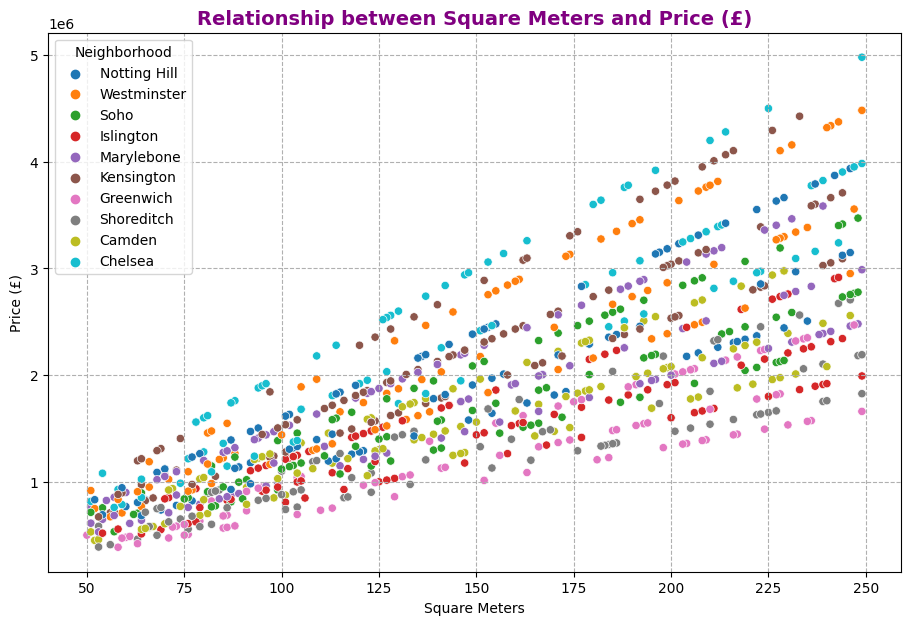

In [46]:
plt.figure(figsize = (11,7))

sns.scatterplot(df, x = 'Square Meters', y = 'Price (£)', hue = 'Neighborhood')

plt.title('Relationship between Square Meters and Price (£)', fontsize = 14, fontweight = 'bold', color = 'Purple')

plt.grid(linestyle ='--')

plt.show()

2. Histogram--->

Question 2.1: Plot a histogram to visualize the distribution of Building Age using sns.histplot.
              Add kde=True to include the density curve.

Question 2.2: Create a histogram of Price (£) and set bins=20 for finer granularity.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


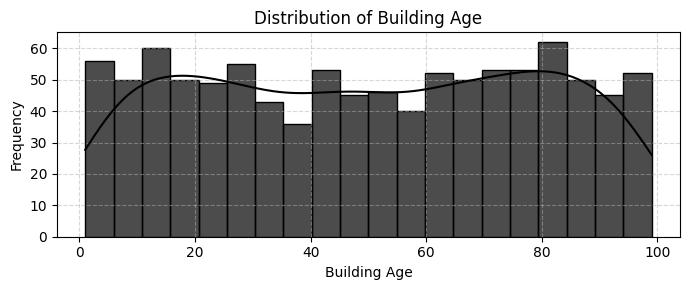

In [47]:
plt.figure(figsize = (7,3))

sns.histplot(df,x = 'Building Age', kde = True, color = 'black', alpha = 0.7,bins = 20)

plt.title('Distribution of Building Age')
plt.xlabel('Building Age')
plt.ylabel('Frequency')

plt.grid(True, linestyle = '--', alpha = 0.5)


plt.tight_layout()
plt.show()

Question 2.2: Create a histogram of Price (£) and set bins=20 for finer granularity.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


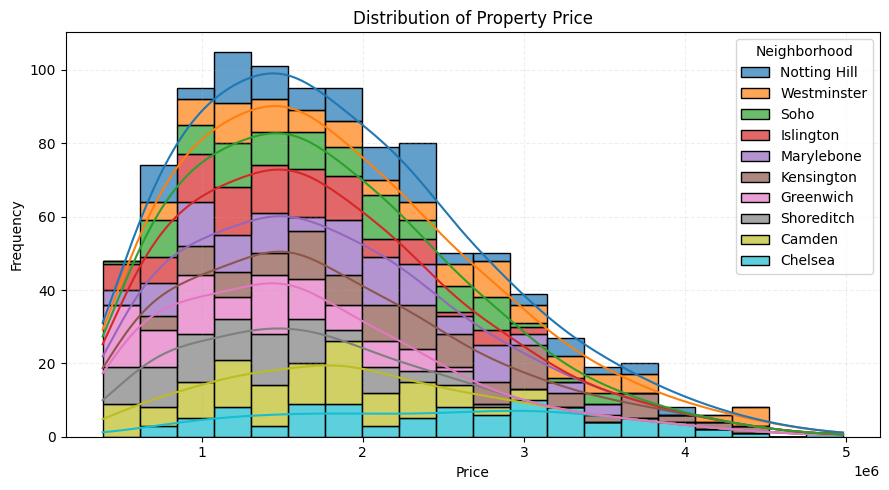

In [48]:
plt.figure(figsize = (9,5))

sns.histplot(df,x = 'Price (£)', kde = True, color = 'black', alpha = 0.7,bins = 20, hue = 'Neighborhood', multiple = 'stack',
             common_norm = False)

plt.title('Distribution of Property Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.grid(True, linestyle = '--', alpha = 0.2)


plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


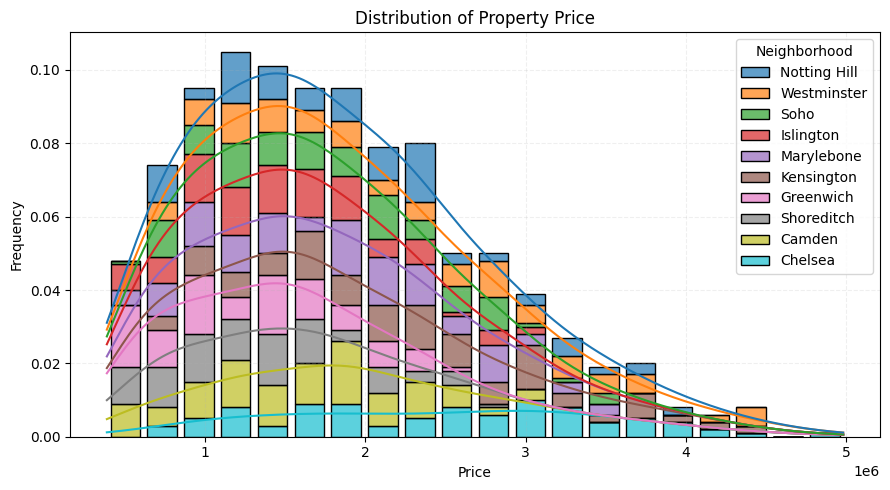

In [49]:
plt.figure(figsize = (9,5))

sns.histplot(df,x = 'Price (£)', kde = True, color = 'black', alpha = 0.7,bins = 20, hue = 'Neighborhood', multiple = 'stack',
            shrink=0.8,stat = 'probability')

plt.title('Distribution of Property Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.grid(True, linestyle = '--', alpha = 0.2)


plt.tight_layout()
plt.show()

3. Boxplot--->

Question 3.1: Create a boxplot to compare Price (£) across different Property Type categories using sns.boxplot.

Question 3.2: Customize the boxplot:
            Rotate the x-axis labels for better readability.
            Add a title.

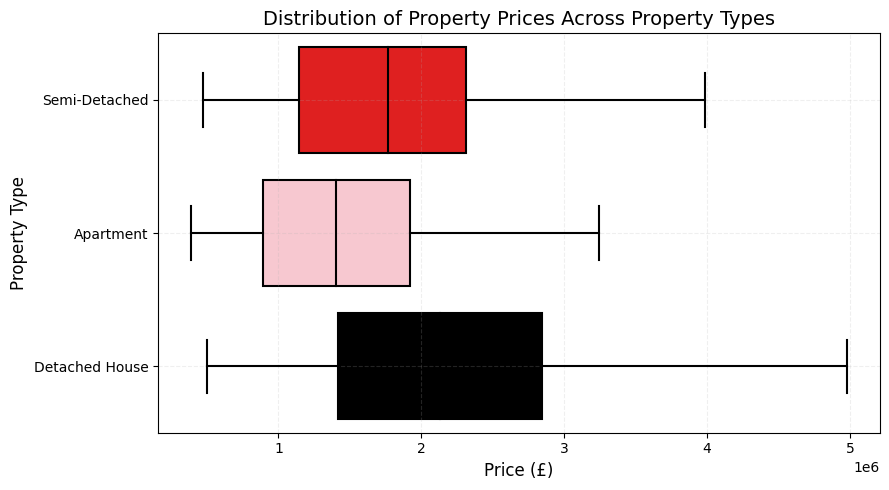

In [50]:
plt.figure(figsize = (9,5))

sns.boxplot(df, x = 'Price (£)', y = 'Property Type', palette = ['red','pink','black'])

plt.title('Distribution of Property Prices Across Property Types', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Property Type', fontsize=12)

plt.grid(True, linestyle = '--', alpha = 0.2)


plt.tight_layout()
plt.show()

In [51]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index,Property_neighbourhood,Floor Description,Renovation Status
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Affordable,10,Premium,False,12800.000000,Luxury,0.078125,Semi-Detached in Notting Hill,Multi-floor,Upgraded
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Luxury,10,Standard,False,12000.000000,Affordable,0.083333,Apartment in Westminster,Single-floor,Standard
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Affordable,0,Premium,True,11200.000000,Affordable,0.089286,Semi-Detached in Soho,Multi-floor,Upgraded
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Affordable,0,Premium,True,8000.000000,Affordable,0.125000,Apartment in Islington,Single-floor,Upgraded
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Affordable,0,Premium,True,12000.000000,Affordable,0.083333,Semi-Detached in Marylebone,Multi-floor,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Luxury,5,Standard,True,14400.000000,Affordable,0.069444,Semi-Detached in Westminster,Multi-floor,Upgraded
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Affordable,0,Premium,False,8666.661538,Budget,0.115385,Apartment in Camden,Single-floor,Standard
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Affordable,5,Standard,True,10399.994764,Affordable,0.096154,Semi-Detached in Camden,Multi-floor,Standard
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Affordable,10,Standard,False,13000.000000,Affordable,0.076923,Detached House in Camden,Multi-floor,Upgraded


Question 3.2: Customize the boxplot:
            Rotate the x-axis labels for better readability.
            Add a title.

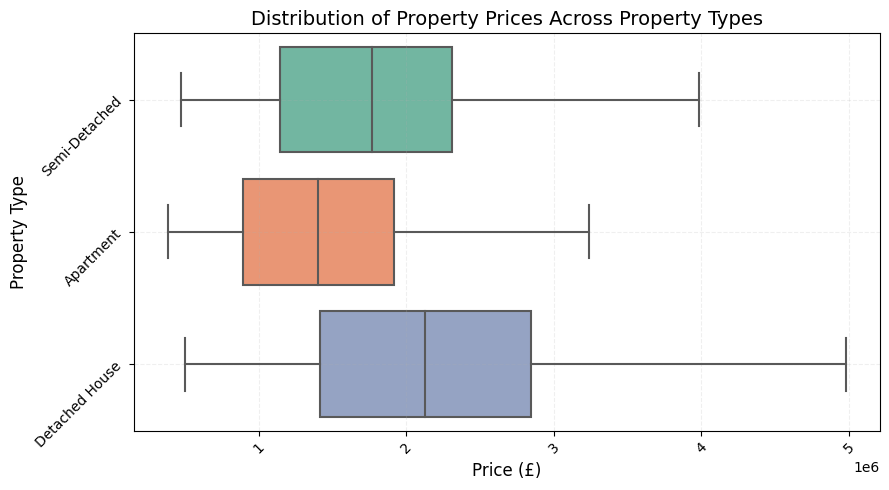

In [52]:
plt.figure(figsize = (9,5))

sns.boxplot(df, x = 'Price (£)', y = 'Property Type', palette = 'Set2', showfliers = True)

plt.title('Distribution of Property Prices Across Property Types', fontsize=14)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Property Type', fontsize=12)

plt.grid(True, linestyle = '--', alpha = 0.2)

plt.xticks(rotation=45)              # for rotation purpose.

plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

8. Pie Chart--->
    
Question 8.1: Create a pie chart using plt.pie to show the proportion of properties by Property Type.

Question 8.2: Use a pie chart to show the percentage of properties that have a Garden (Yes vs No).

In [53]:
df['Property Type']

0       Semi-Detached
1           Apartment
2       Semi-Detached
3           Apartment
4       Semi-Detached
            ...      
995     Semi-Detached
996         Apartment
997     Semi-Detached
998    Detached House
999         Apartment
Name: Property Type, Length: 1000, dtype: object

In [54]:
property_count = df['Property Type'].value_counts()

In [55]:
labels = property_count.index

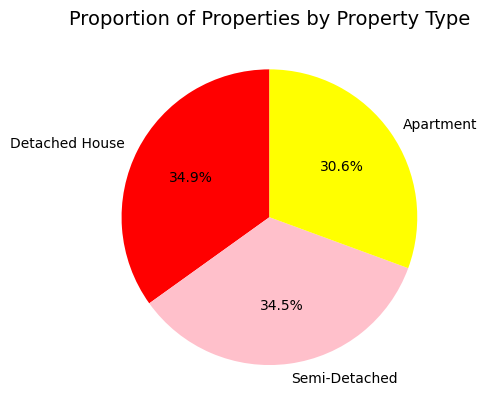

In [56]:
plt.pie(x = property_count,startangle = 90, autopct = '%1.1f%%', colors = ['red','pink','yellow'], labels = labels )

plt.title('Proportion of Properties by Property Type', fontsize=14)


plt.show()

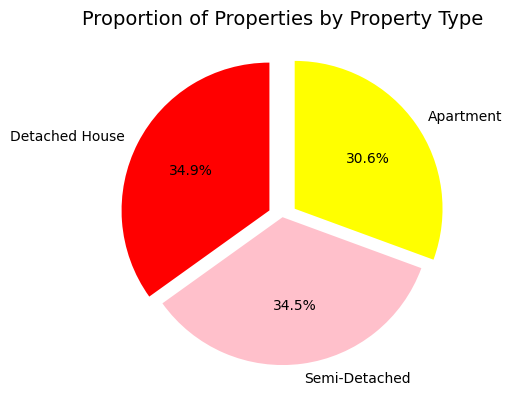

In [57]:
plt.pie(x = property_count,startangle = 90, autopct = '%1.1f%%', colors = ['red','pink','yellow'], labels = labels, explode = [0.1,0,0.1])

plt.title('Proportion of Properties by Property Type', fontsize=14)


plt.show()

Question 8.2: Use a pie chart to show the percentage of properties that have a Garden (Yes vs No).

In [58]:
garden_count = df['Garden'].value_counts()
garden_count

Garden
Yes    512
No     488
Name: count, dtype: int64

In [59]:
label = garden_count.index
label

Index(['Yes', 'No'], dtype='object', name='Garden')

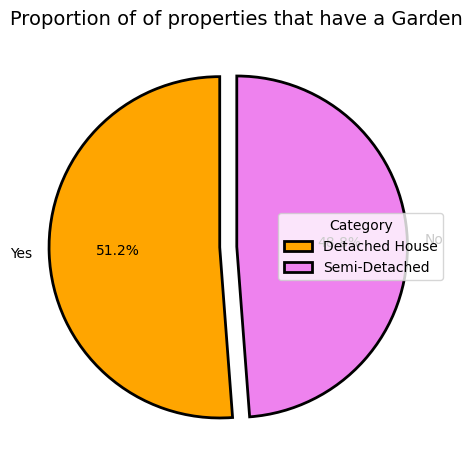

In [60]:
plt.pie(garden_count, labels = label, startangle = 90, autopct = '%1.1f%%', colors = ['orange','violet'],
        explode = [0.1,0], wedgeprops = {'linewidth' : 2, 'edgecolor' : 'black'} )

plt.title('Proportion of of properties that have a Garden', fontsize=14)

plt.legend(labels, title='Category', loc='best')

plt.tight_layout()
plt.show()

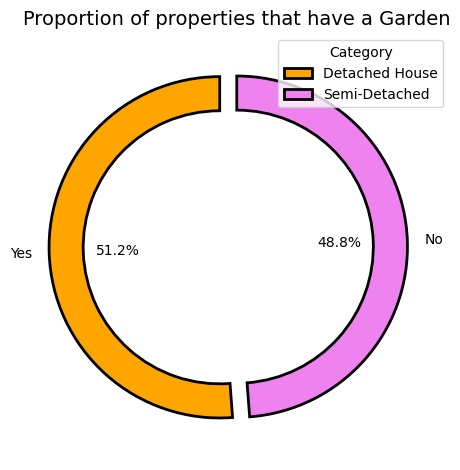

In [61]:
plt.pie(garden_count, labels = label, startangle = 90, autopct = '%1.1f%%', colors = ['orange','violet'], explode = [0.1,0],
        wedgeprops={'width':0.2,'linewidth': 2,'edgecolor': 'black'} )

plt.title('Proportion of properties that have a Garden', fontsize=14)

plt.legend(labels, title='Category', loc='best')

plt.tight_layout()
plt.show()

In [62]:
sns.heatmap

<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

In [63]:
df_corr = df.corr(numeric_only = True)        # find correlation first.

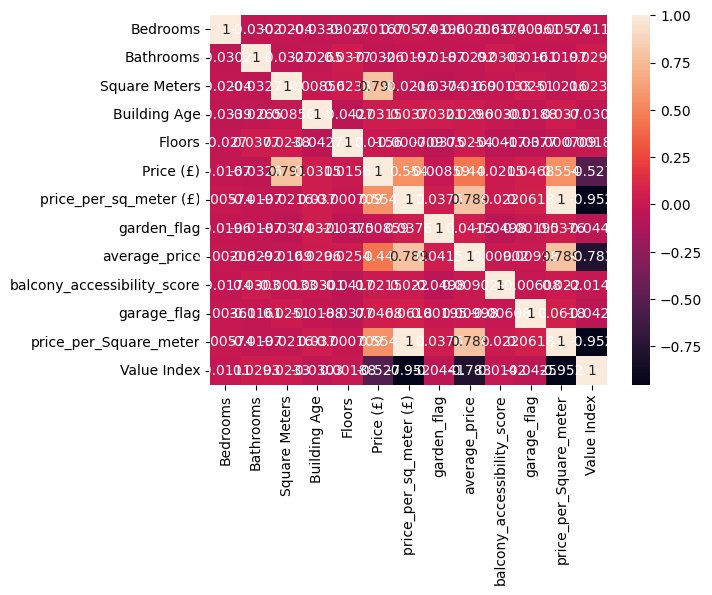

In [64]:
sns.heatmap(df_corr, annot = True, fmt = '.3g')    # then do the plotting.
plt.show()

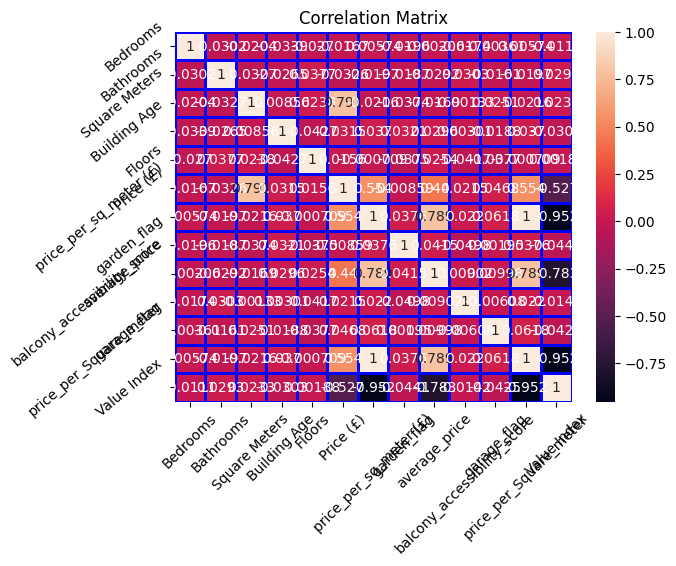

In [65]:
sns.heatmap(df_corr, annot = True, fmt = '.3g',linecolor = 'blue',linewidths = 2)

plt.title('Correlation Matrix', fontsize = 12)



plt.xticks(rotation = 45)
plt.yticks(rotation = 40)

plt.show()

In [66]:
df

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,...,neighborhood_category,balcony_accessibility_score,material_category,garage_flag,price_per_Square_meter,new_category,Value Index,Property_neighbourhood,Floor Description,Renovation Status
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,...,Affordable,10,Premium,False,12800.000000,Luxury,0.078125,Semi-Detached in Notting Hill,Multi-floor,Upgraded
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,...,Luxury,10,Standard,False,12000.000000,Affordable,0.083333,Apartment in Westminster,Single-floor,Standard
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,...,Affordable,0,Premium,True,11200.000000,Affordable,0.089286,Semi-Detached in Soho,Multi-floor,Upgraded
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,...,Affordable,0,Premium,True,8000.000000,Affordable,0.125000,Apartment in Islington,Single-floor,Upgraded
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,...,Affordable,0,Premium,True,12000.000000,Affordable,0.083333,Semi-Detached in Marylebone,Multi-floor,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1,3,81,4,Yes,Yes,2,Semi-Detached,...,Luxury,5,Standard,True,14400.000000,Affordable,0.069444,Semi-Detached in Westminster,Multi-floor,Upgraded
996,165 Park Lane,Camden,1,1,65,51,No,No,1,Apartment,...,Affordable,0,Premium,False,8666.661538,Budget,0.115385,Apartment in Camden,Single-floor,Standard
997,99 Camden High Street,Camden,4,1,191,27,No,Yes,2,Semi-Detached,...,Affordable,5,Standard,True,10399.994764,Affordable,0.096154,Semi-Detached in Camden,Multi-floor,Standard
998,155 Park Lane,Camden,5,2,131,3,Yes,No,2,Detached House,...,Affordable,10,Standard,False,13000.000000,Affordable,0.076923,Detached House in Camden,Multi-floor,Upgraded


6. Heatmap--->
                                                                                  
Question 6.1: Create a heatmap to visualize the correlation matrix for Square Meters, Price (£), Building Age, and Floors.

Question 6.2: Add annotations (annot=True) to display the correlation coefficients on the heatmap.

In [67]:
df_co = df[['Square Meters','Price (£)','Building Age','Floors']]
correlation_matrix = df_co.corr()

In [68]:
correlation_matrix

,Square Meters,Price (£),Building Age,Floors
Square Meters,1.000000,0.790652,0.008557,0.023822
Price (£),0.790652,1.000000,0.031522,0.015625
Building Age,0.008557,0.031522,1.000000,-0.042743
Floors,0.023822,0.015625,-0.042743,1.000000


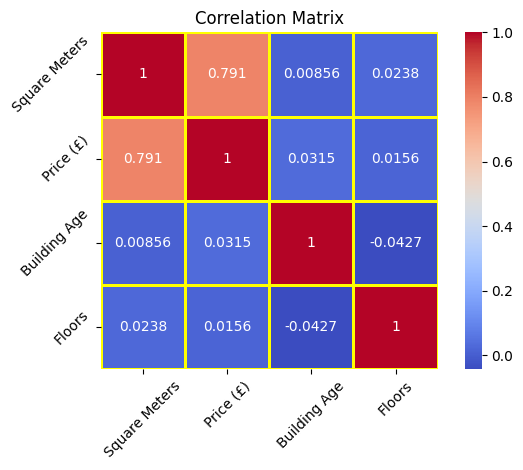

In [69]:
sns.heatmap(correlation_matrix,fmt='.3g',annot=True, cmap='coolwarm', linewidths=2, linecolor='yellow', square = True)

plt.title('Correlation Matrix', fontsize = 12)

plt.xticks(rotation = 45,fontsize=10)
plt.yticks(rotation = 45,fontsize=10)

plt.tight_layout()
plt.show()

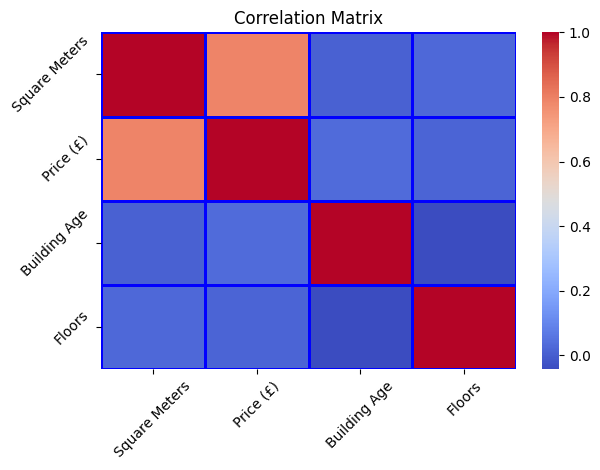

In [70]:
sns.heatmap(correlation_matrix,fmt='.3g',cmap='coolwarm', linewidths=2, linecolor='blue')

plt.title('Correlation Matrix', fontsize = 12)

plt.xticks(rotation = 45,fontsize=10)
plt.yticks(rotation = 45,fontsize=10)

plt.tight_layout()
plt.show()